Mounted at /content/drive
Dataset loaded successfully! ✅

First 5 rows of dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  I

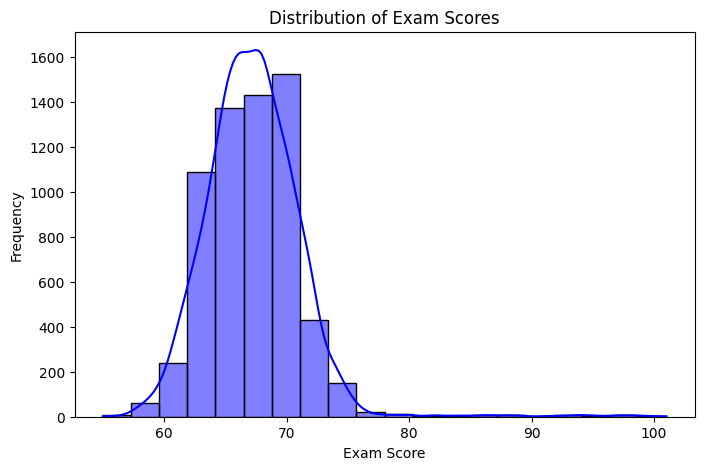

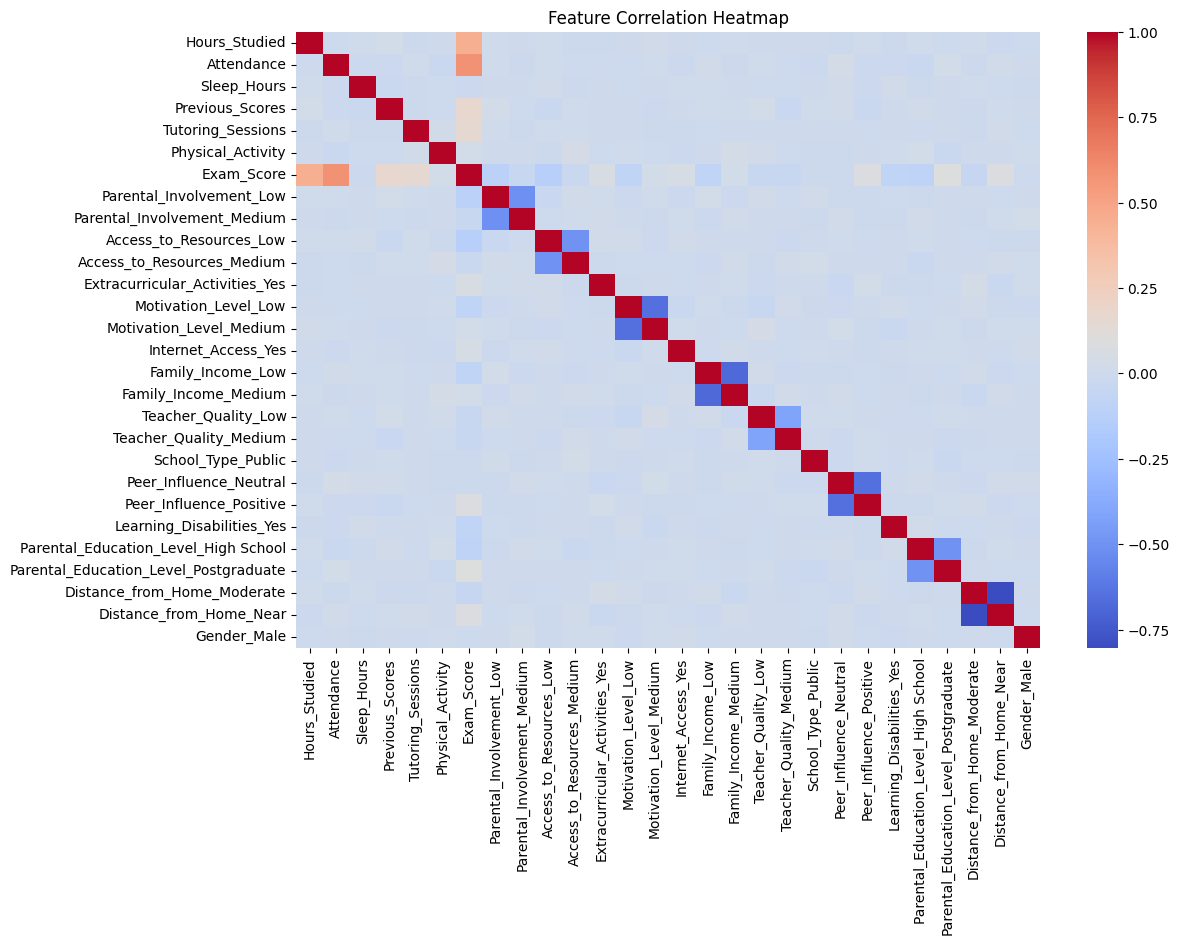


Training Samples: 5102
Testing Samples: 1276

🔹 Linear Regression Performance:
Mean Squared Error (MSE): 4.17
R² Score: 0.73

🔹 Polynomial Regression Performance:
Mean Squared Error (MSE): 4.62
R² Score: 0.70

Sample Predictions (first 10 test samples):
   Actual  Linear_Predicted  Polynomial_Predicted
0      74         73.972779             74.045199
1      66         66.003596             64.932424
2      70         70.472056             70.715264
3      72         71.964514             72.263338
4      67         67.460347             68.369917
5      69         69.502968             69.273413
6      72         72.269580             72.687704
7      66         66.232564             67.044761
8      69         68.847153             68.854635
9      68         67.946078             69.195490


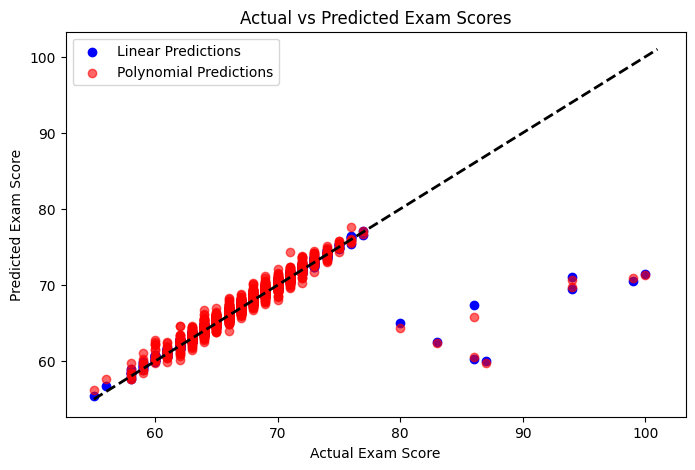

In [2]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive


# CONNECT GOOGLE DRIVE
drive.mount('/content/drive')

# Replace this path with the path where your CSV file is stored in Drive
data_path = "/content/drive/MyDrive/StudentPerformanceFactors.csv"

# LOAD DATA
df = pd.read_csv(data_path)
print("Dataset loaded successfully! ✅")
print("\nFirst 5 rows of dataset:")
print(df.head())

# BASIC INFO & CLEANING
print("\nDataset Info:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Drop rows with missing values (if few), else handle appropriately
df.dropna(inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

print("\nColumns after encoding:")
print(df.columns)

# BASIC VISUALIZATION
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# TRAIN-TEST SPLIT
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


# STEP 6: LINEAR REGRESSION
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation
print("\n🔹 Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_linear):.2f}")


# POLYNOMIAL REGRESSION (BONUS)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

# Evaluation
print("\n🔹 Polynomial Regression Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.2f}")


# 🔎 SHOW SAMPLE PREDICTIONS
results = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Linear_Predicted": y_pred_linear[:10],
    "Polynomial_Predicted": y_pred_poly[:10]
})
print("\nSample Predictions (first 10 test samples):")
print(results)


# VISUALIZATION OF PREDICTIONS
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linear, label="Linear Predictions", color='blue')
plt.scatter(y_test, y_pred_poly, label="Polynomial Predictions", color='red', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.title('Actual vs Predicted Exam Scores')
plt.show()
